# Basic statistics

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">

This notebook is an element of the free [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/). 

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

This notebook contains an introduction to use of Python and the NumPy library for basic statistical calculations.
See the [associated course materials](https://risk-engineering.org/statistical-modelling/) for background information and to download this content as a Jupyter notebook.

We start by importing the numpy library, which makes it possible to use functions and variables from the library, prefixed by `numpy`.

In [1]:
import numpy

We can use Python as simple interactive calculator:

In [2]:
2 + 3 + 4

9

Here we call the `sqrt` function from the numpy library.

In [3]:
numpy.sqrt(2 + 2)

2.0

Some useful constants are predefined.

In [4]:
numpy.pi

3.141592653589793

In [5]:
numpy.sin(numpy.pi)

1.2246467991473532e-16

The notation `e-16` above means $10^{-16}$; the number above is very very small (it’s a numerical approximation to the mathematical answer of zero).

We can generate a random number from a uniform distribution between 20 and 30. If you evaluate this several times (in most Jupyter interfaces, press `Shift-Enter` or press on the `Run` button in the toolbar above), it will generate a different random number each time.

In [6]:
numpy.random.uniform(20, 30)

25.1437515786662

In [7]:
numpy.random.uniform(20, 30)

25.04101521213037

We can generate an **array** of random numbers by passing a third argument to the `numpy.random.uniform` function, saying how many random numbers we want. We store the array in a *variable* named `obs`.

In [8]:
obs = numpy.random.uniform(20, 30, 10)
obs

array([25.371427  , 25.20324491, 23.10450399, 22.72975024, 26.2111469 ,
       26.67308058, 28.1365947 , 29.42437473, 23.9345215 , 28.74785977])

The builtin function `len` in Python tells us the length of an array or a list.

In [9]:
len(obs)

10

We can do arithmetic on arrays, adding them together or subtracting a constant from each element.

In [10]:
obs + obs

array([50.74285399, 50.40648983, 46.20900799, 45.45950048, 52.4222938 ,
       53.34616115, 56.27318939, 58.84874946, 47.86904299, 57.49571954])

In [11]:
obs - 25

array([ 0.371427  ,  0.20324491, -1.89549601, -2.27024976,  1.2111469 ,
        1.67308058,  3.1365947 ,  4.42437473, -1.0654785 ,  3.74785977])

We can apply a numpy function to all the elements of an array. 

In [12]:
numpy.sqrt(obs)

array([5.03700576, 5.02028335, 4.80671447, 4.76757278, 5.1196823 ,
       5.16459878, 5.3043939 , 5.42442391, 4.89229205, 5.36170307])

The array has *methods*, a kind of function that acts on the array.

In [13]:
obs.mean()

25.953650431503206

In [14]:
obs.sum()

259.53650431503206

In [15]:
obs.min()

22.72975024207144

There are similar functions in the `numpy` library that take an array as argument:

In [16]:
numpy.mean(obs)

25.953650431503206

In [17]:
numpy.sum(obs)

259.53650431503206

In [18]:
numpy.min(obs)

22.72975024207144

## Simple plotting

The matplotlib library allows you to generate many types of plots and statistical graphs in a convenient way. The [online gallery](https://matplotlib.org/gallery.html) shows the variety of plots available, and the [documentation](https://matplotlib.org/contents.html) is also available online. We import the `pyplot` component of matplotlib and give it an alias `plt`. 

In [19]:
import matplotlib.pyplot as plt
plt.style.use("bmh")  # this affects the style (colors etc.) of plots
%config InlineBackend.figure_formats=["svg"]

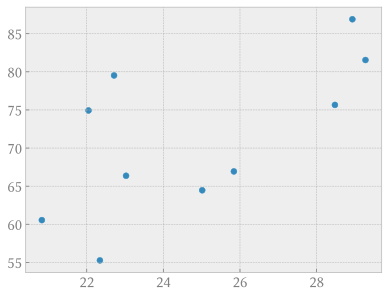

In [20]:
X = numpy.random.uniform(20, 30, 10)
Y = numpy.random.uniform(50, 100, 10)
plt.scatter(X, Y);

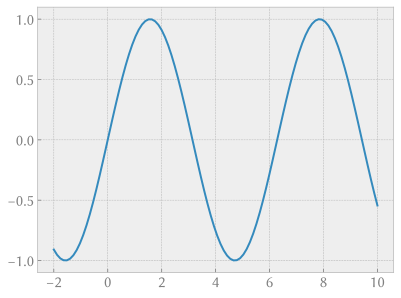

In [21]:
x = numpy.linspace(-2, 10, 100)
plt.plot(x, numpy.sin(x));

We can add two vectors together, assuming that all their dimensions are identical. Our array $x$ has one dimension of size 100. We can add another random vector of size 100 to it, containing numbers drawn from a uniform probability distribution between -0.1 and 0.1 (these represent some random “noise” which is added to our sine curve).

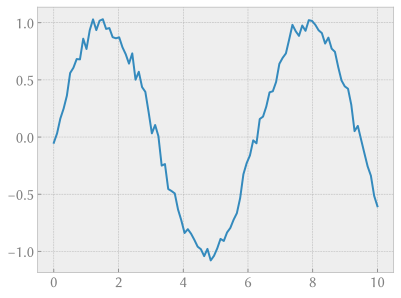

In [22]:
x = numpy.linspace(0, 10, 100)
obs = numpy.sin(x) + numpy.random.uniform(-0.1, 0.1, 100)
plt.plot(x, obs);

The **central limit theorem** states that the sum of a number of independent random variables tends toward a normal distribution even if the original variables themselves are not normally distributed. We illustrate this result by examining the distribution of the sums of 1000 realizations of a uniformly distributed random variable, plotting the distribution as a histogram. 

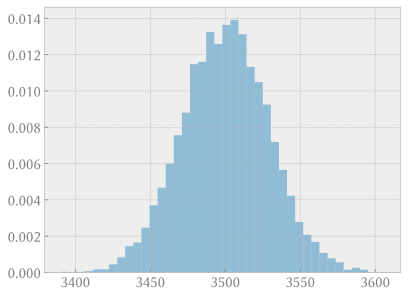

In [23]:
N = 10_000
sim = numpy.zeros(N)
for i in range(N):
    sim[i] = numpy.random.uniform(30, 40, 100).sum()
plt.hist(sim, bins=40, alpha=0.5, density=True);